In [7]:
import codecs
import re
import numpy as np
import statistics
import sklearn.naive_bayes as nb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
import sklearn.feature_extraction.text as txt
from sklearn import linear_model as lin
from sklearn.model_selection import cross_validate
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
my_tokenizer = RegexpTokenizer(r'\w+')
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))

In [2]:
def read_file(fn):
    with codecs.open(fn, encoding="utf-8") as f:
        return f.read()


def compteLignes(fname):
    fd = open(fname, 'r')
    n = 0
    for line in fd:
        n += 1
    return n

In [3]:
def stemSentence(sentence):
    token_words=res=[token.lower() for token in (tokenizer.tokenize(sentence))]
    stem_sentence=[]
    for word in token_words:
        if word not in stopwords:
            stem_sentence.append(stemmer.stem(word))
            stem_sentence.append(" ")
    return "".join(stem_sentence)

In [4]:
def file_array(fname,nblignes):
    nblignes = compteLignes(fname)
    print("nblignes = %d" % nblignes)
    alltxts = []
    labs = np.ones(nblignes)
    s = codecs.open(fname, 'r', 'utf-8')  # pour régler le codage
    cpt = 0
    for i in range(nblignes):
        txt = s.readline()
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*", "\\1", txt)
        texteBrut = re.sub(r"<[0-9]*:[0-9]*:.>(.*)", "\\1", txt)
        if lab.count('M') > 0:
            labs[cpt] = -1
        texteBrut = texteBrut.strip("\n")
        texteTransforme = stemSentence(texteBrut)
        alltxts.append(texteTransforme)
        cpt += 1
    x = np.array(alltxts)
    y = np.array(labs)
    return x[:nblignes], y[:nblignes]

def file_arrayRaw(fname,nblignes):
    nblignes = compteLignes(fname)
    print("nblignes = %d"%nblignes)
    alltxts = []
    labs = np.ones(nblignes)
    s = codecs.open(fname, 'r', 'utf-8')  # pour régler le codage
    cpt = 0
    miter=[]
    chirac=[]
    for i in range(nblignes):
        txt = s.readline()
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*", "\\1", txt)
        texteBrut = re.sub(r"<[0-9]*:[0-9]*:.>(.*)", "\\1", txt)
        if lab.count('M') > 0:
            labs[cpt] = -1
            miter.append(texteBrut)
        else:
            chirac.append(texteBrut)
        alltxts.append(texteBrut)
        cpt += 1
    x = np.array(alltxts)
    y = np.array(labs)
    return x[:nblignes], y[:nblignes]

In [5]:
def equilibrageClasses(data,labels):
    classePos = np.where(labels == 1)[0]
    classeNeg = np.where(labels == -1)[0]
    dataPos = data[np.where(labels == 1)[0]]
    dataNeg = data[np.where(labels == -1)[0]]
    np.random.shuffle(dataPos)
    np.random.shuffle(dataNeg)
    if len(classePos)<len(classeNeg):
        dataNeg = dataNeg[:len(classePos)]
    else:
        dataPos = dataPos[:len(classeNeg)]
    data = np.append(dataPos,dataNeg)
    labels = [1 for i in range(len(dataPos))]+[-1 for i in range(len(dataPos))]
    return data,np.array(labels)

In [8]:
n_train = 10000
n_test = 1000

fname_train = "corpus.tache1.learn.utf8"
fname_test = "corpus.tache1.test.utf8"

print(compteLignes(fname_train))
print(compteLignes(fname_test))
data, labels = file_arrayRaw(fname_train,10000)
data_train, data_test, y_train, y_test = train_test_split( data, labels, test_size=0.3)
tfidf_vectorizer = txt.TfidfVectorizer()
x_train = tfidf_vectorizer.fit_transform(data_train)

57413
27162
nblignes = 57413


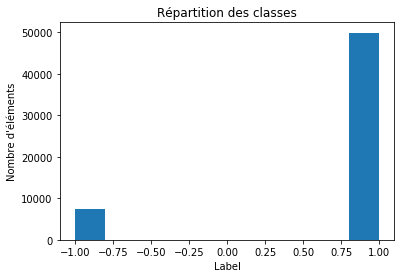

In [9]:
plt.hist(labels)
plt.title("Répartition des classes")
plt.xlabel("Label")
plt.ylabel("Nombre d'éléments")
plt.savefig("labels")

In [10]:
svc = svm.LinearSVC()
svc.fit(x_train,y_train)

x_test = tfidf_vectorizer.transform(data_test)

ypred = svc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        -1.0       0.69      0.41      0.51      2260
         1.0       0.92      0.97      0.94     14964

    accuracy                           0.90     17224
   macro avg       0.80      0.69      0.73     17224
weighted avg       0.89      0.90      0.89     17224



In [9]:
dataEq, labelsEq = equilibrageClasses(data,labels)
data_train, data_test, y_train, y_test = train_test_split( dataEq, labelsEq, test_size=0.3)

tfidf_vectorizer = txt.TfidfVectorizer()
x_train = tfidf_vectorizer.fit_transform(data_train)

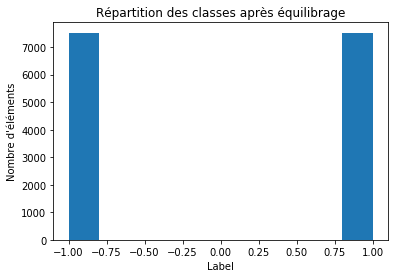

In [12]:
plt.hist(labelsEq)
plt.title("Répartition des classes après équilibrage")
plt.xlabel("Label")
plt.ylabel("Nombre d'éléments")
plt.savefig("labelsEq")

In [13]:
svc = svm.LinearSVC()
svc.fit(x_train,y_train)

x_test = tfidf_vectorizer.transform(data_test)

ypred = svc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          -1       0.77      0.78      0.77      2251
           1       0.78      0.77      0.77      2263

    accuracy                           0.77      4514
   macro avg       0.77      0.77      0.77      4514
weighted avg       0.77      0.77      0.77      4514



In [20]:
dataEq, labelsEq = equilibrageClasses(data,labels)
data_train, data_test, y_train, y_test = train_test_split( dataEq, labelsEq, test_size=0.3)

svc = svm.LinearSVC()
cv = txt.CountVectorizer()
x_train = cv.fit_transform(data_train)
svc.fit(x_train,y_train)

data_train, data_test, y_train, y_test = train_test_split( data, labels, test_size=0.3)
x_test = cv.transform(data_test)
ypred = svc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        -1.0       0.37      0.91      0.53      2195
         1.0       0.98      0.78      0.87     15029

    accuracy                           0.79     17224
   macro avg       0.68      0.85      0.70     17224
weighted avg       0.91      0.79      0.83     17224



In [21]:
data_train, data_test, y_train, y_test = train_test_split( data, labels, test_size=0.3)

svc = svm.LinearSVC()
cv = txt.CountVectorizer()
x_train = cv.fit_transform(data_train)
svc.fit(x_train,y_train)

#data_train, data_test, y_train, y_test = train_test_split( data, labels, test_size=0.3)
x_test = cv.transform(data_test)
ypred = svc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        -1.0       0.58      0.47      0.52      2244
         1.0       0.92      0.95      0.94     14980

    accuracy                           0.89     17224
   macro avg       0.75      0.71      0.73     17224
weighted avg       0.88      0.89      0.88     17224



In [114]:
def my_tokenizer(text):
    text=re.sub("(\\W)"," \\1 ",text)
    return re.split("\\s+",text)

RL = LogisticRegression()
cv = txt.CountVectorizer(lowercase=False,min_df=2,max_df=0.50,tokenizer=my_tokenizer,ngram_range=(1,2),max_features=70000)
x_train = cv.fit_transform(data_train)

In [115]:
RL.fit(x_train,y_train)
x_test = cv.transform(data_test)
ypred = RL.predict(x_test)
print(classification_report(y_test,ypred))

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

        -1.0       0.76      0.48      0.59      2195
         1.0       0.93      0.98      0.95     15029

    accuracy                           0.91     17224
   macro avg       0.84      0.73      0.77     17224
weighted avg       0.91      0.91      0.91     17224



In [116]:
dataEq, labelsEq = equilibrageClasses(data,labels)
data_train, data_test, y_train, y_test = train_test_split( dataEq, labelsEq, test_size=0.3)
RL = LogisticRegression()
cv = txt.CountVectorizer(lowercase=False,min_df=2,max_df=0.50,tokenizer=my_tokenizer,ngram_range=(1,2),max_features=70000)
x_train = cv.fit_transform(data_train)
RL.fit(x_train,y_train)
x_test = cv.transform(data_test)
ypred = RL.predict(x_test)
print(classification_report(y_test,ypred))

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

          -1       0.81      0.80      0.81      2222
           1       0.81      0.82      0.82      2292

    accuracy                           0.81      4514
   macro avg       0.81      0.81      0.81      4514
weighted avg       0.81      0.81      0.81      4514



In [18]:
import sklearn.feature_extraction.text as txt
pipeline = Pipeline([
    ('tfidf', txt.TfidfVectorizer()),
    ('clf', LogisticRegression()),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.05,0.1,0.25),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
    #'tfidf__max_features': (1000,5000,10000,70000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [19]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.75, max_features=None,
                                 min_df=0.05, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [22]:
dataEq, labelsEq = equilibrageClasses(data,labels)
data_trainEq, data_testEq, y_trainEq, y_testEq = train_test_split( dataEq, labelsEq, test_size=0.3)

RL = LogisticRegression()
cv = txt.TfidfVectorizer(lowercase=False,min_df=0.05,max_df=0.75,ngram_range=(1,2))
x_train = cv.fit_transform(data_trainEq)
RL.fit(x_train,y_trainEq)
x_test = cv.transform(data_testEq)
ypred = RL.predict(x_test)
print(classification_report(y_testEq,ypred))

              precision    recall  f1-score   support

          -1       0.67      0.62      0.64      2240
           1       0.65      0.70      0.68      2274

    accuracy                           0.66      4514
   macro avg       0.66      0.66      0.66      4514
weighted avg       0.66      0.66      0.66      4514



In [26]:
pipeline = Pipeline([
    ('tfidf', txt.CountVectorizer()),
    ('clf', svm.SVC()),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.05,0.1,0.25),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
    #'tfidf__max_features': (1000,5000,10000,70000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, n_jobs=4,verbose=10)
grid_search_tune.fit(dataEq, labelsEq)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   29.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   40.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   53.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [27]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.75,
                                 max_features=None, min_df=0.05,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
              

In [16]:
RL = LogisticRegression()
dataEq, labelsEq = (data,labels)
cv = txt.CountVectorizer(lowercase=True,min_df=0.05,max_df=0.75,ngram_range=(1,1))
x_train = cv.fit_transform(dataEq)
scores = cross_validate(RL,x_train, labelsEq, cv=5, scoring=['f1',"precision","recall"],verbose=10)
print(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ........ , f1=0.931, precision=0.876, recall=0.993, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........ , f1=0.932, precision=0.877, recall=0.995, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ........ , f1=0.930, precision=0.877, recall=0.991, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] ........ , f1=0.931, precision=0.876, recall=0.994, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] ........ , f1=0.931, precision=0.879, recall=0.990, total=   0.3s
{'fit_time': array([0.2461648 , 0.22303605, 0.26301861, 0.23801804, 0.22501588]), 'score_time': array([0.04000115, 0.02998424, 0.02001381, 0.02400041, 0.02600241]), 'test_f1': array([0.93087731, 0.93202516, 0.9303026 , 0.93124178, 0.93145389]), 'test_precision': array([0.87631602, 0.8766337 , 0.87694082, 0.8762595 , 0.87938401]), 'test_recall': array([0.9926839 , 0.99488876, 0.99057927, 0.99358589, 0.99007817])}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [19]:
RL = LogisticRegression()
cv = txt.CountVectorizer(lowercase=True,min_df=0.05,max_df=0.75,ngram_range=(1,1))
x_train = cv.fit_transform(data_train)
RL.fit(x_train,y_train)
x_test = cv.transform(data_test)
ypred = RL.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        -1.0       0.60      0.08      0.14      2249
         1.0       0.88      0.99      0.93     14975

    accuracy                           0.87     17224
   macro avg       0.74      0.54      0.54     17224
weighted avg       0.84      0.87      0.83     17224



In [20]:
RL = LogisticRegression()
cv = txt.CountVectorizer(lowercase=True,min_df=0.05,max_df=0.75,ngram_range=(1,1))
dataEq, labelsEq = equilibrageClasses(data,labels)
data_trainEq, data_testEq, y_trainEq, y_testEq = train_test_split( dataEq, labelsEq, test_size=0.3)
x_train = cv.fit_transform(data_trainEq)
RL.fit(x_train,y_trainEq)
x_test = cv.transform(data_testEq)
ypred = RL.predict(x_test)
print(classification_report(y_testEq,ypred))

              precision    recall  f1-score   support

          -1       0.73      0.58      0.65      2272
           1       0.65      0.78      0.71      2242

    accuracy                           0.68      4514
   macro avg       0.69      0.68      0.68      4514
weighted avg       0.69      0.68      0.68      4514



In [26]:
pipeline = Pipeline([
    ('tfidf', txt.TfidfVectorizer()),
    ('clf', MultinomialNB()),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.05,0.1,0.25),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
    #'tfidf__max_features': (1000,5000,10000,70000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, n_jobs=4,verbose=10)
grid_search_tune.fit(dataEq, labelsEq)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   30.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:   47.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [27]:
print(grid_search_tune.best_score_)

0.6639648836584345


In [33]:
pipeline = Pipeline([
    ('tfidf', txt.TfidfVectorizer()),
    ('clf', LogisticRegression()),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.05,0.1,0.25),
    'tfidf__ngram_range': ((1, 1), (1, 2), (1, 3))
    #'tfidf__max_features': (1000,5000,10000,70000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, n_jobs=4,verbose=10)
grid_search_tune.fit(dataEq, labelsEq)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   24.4s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   29.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   45.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   52.7s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [34]:
print(grid_search_tune.best_score_)

0.6819756307897148


In [35]:
data[0]

" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n"

1000
6000
11000
16000
21000
26000
31000
36000
41000
46000
51000
56000
61000
66000
71000
76000
81000
86000
91000
96000


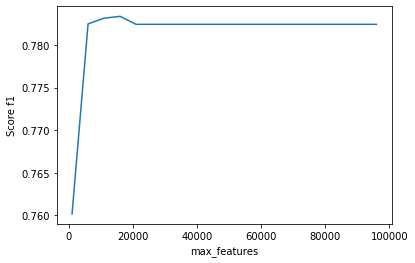

In [65]:
arrayMaxFeatures = np.arange(1000,100000,5000)
res=[]
for elt in arrayMaxFeatures:
    print(elt)
    clf = LogisticRegression()
    vect = txt.TfidfVectorizer(max_features=elt)
    x = vect.fit_transform(dataEq)
    scores = cross_validate(clf,x, labelsEq, cv=5, scoring='f1')
    res.append(statistics.mean(scores['test_score']))
plt.plot(arrayMaxFeatures,res)
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.show()

1000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

6000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

11000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

16000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

21000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

26000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

31000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

36000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

41000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

46000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

51000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

56000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

61000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

66000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

71000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

76000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

81000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

86000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

91000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

96000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

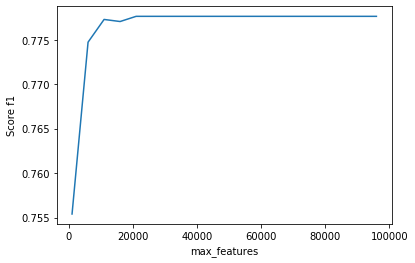

In [25]:
arrayMaxFeatures = np.arange(1000,100000,5000)
res2=[]
for elt in arrayMaxFeatures:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(max_features=elt)
    x_train = vect.fit_transform(dataEq)
    scores = cross_validate(clf,x_train, labelsEq, cv=5, scoring='f1')
    res2.append(statistics.mean(scores['test_score']))
plt.plot(arrayMaxFeatures,res2)
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.show()

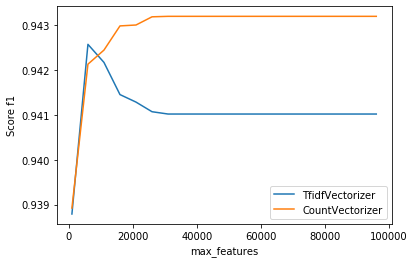

In [18]:
plt.plot(arrayMaxFeatures,res,label="TfidfVectorizer")
plt.plot(arrayMaxFeatures,res2,label="CountVectorizer")
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.legend()

1000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


6000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

11000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

16000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

21000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

26000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

31000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

36000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

41000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

46000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

51000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

56000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

61000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

66000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

71000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

76000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

81000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

86000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

91000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

96000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

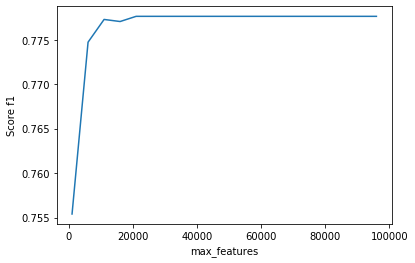

In [26]:
arrayMaxFeatures = np.arange(1000,100000,5000)
res3=[]
for elt in arrayMaxFeatures:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(max_features=elt,binary=True)
    x_train = vect.fit_transform(dataEq)
    scores = cross_validate(clf,x_train, labelsEq, cv=5, scoring='f1')
    res3.append(statistics.mean(scores['test_score']))
plt.plot(arrayMaxFeatures,res2)
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.show()

In [124]:
print(arrayMaxFeatures[19])
print(res[19])
print(res2[19])
print(res3[19])

31000
0.7824525267364263
0.7776537515328924
0.7773940316245828


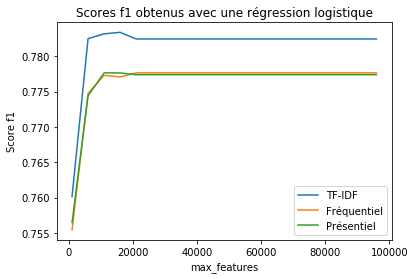

In [238]:
arrayMaxFeatures = np.arange(1000,100000,5000)
plt.plot(arrayMaxFeatures,res,label="TF-IDF")
plt.plot(arrayMaxFeatures,res2,label="Fréquentiel")
plt.plot(arrayMaxFeatures,res3,label="Présentiel")
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec une régression logistique")
plt.legend()
plt.savefig("comparevectorizerEQ.png")

In [30]:
data = dataEq
labels = labelsEq

0


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.05
0.1
0.15
0.25


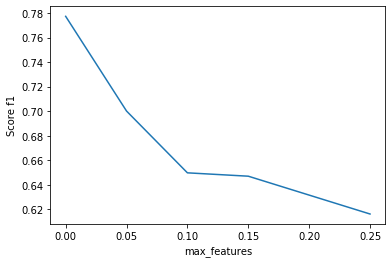

In [31]:
arrayMinDf = [0,0.05,0.1,0.15,0.25]
res4=[]
for elt in arrayMinDf:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(binary=True,min_df=elt,max_features=30000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res4.append(statistics.mean(scores['test_score']))
plt.plot(arrayMinDf,res4)
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.show()

0


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.05
0.1
0.15
0.25


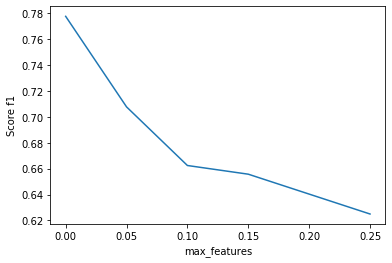

In [32]:
arrayMinDf = [0,0.05,0.1,0.15,0.25]
res5=[]
for elt in arrayMinDf:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(binary=False,min_df=elt,max_features=30000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res5.append(statistics.mean(scores['test_score']))
plt.plot(arrayMinDf,res5)
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.show()

0
0.05
0.1
0.15
0.25


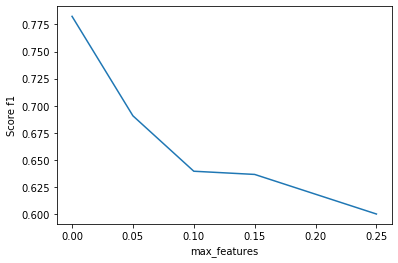

In [33]:
arrayMinDf = [0,0.05,0.1,0.15,0.25]
res6=[]
for elt in arrayMinDf:
    print(elt)
    clf = LogisticRegression()
    vect = txt.TfidfVectorizer(min_df=elt,max_features=30000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res6.append(statistics.mean(scores['test_score']))
plt.plot(arrayMinDf,res6)
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.show()

In [125]:
print(arrayMinDf)
print(res6)
print(res5)
print(res4)

[0, 0.05, 0.1, 0.15, 0.25]
[0.7824525267364263, 0.6908027987863026, 0.6397413898617917, 0.6367960046689042, 0.6003278585949549]
[0.7776537515328924, 0.7077334437883496, 0.662455906392489, 0.6557474726089434, 0.6249959925993431]
[0.7773940316245828, 0.7001551441185581, 0.6497757544105522, 0.6470336423067179, 0.6161972002344895]


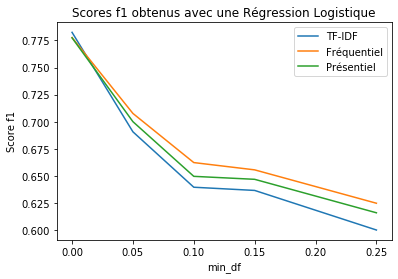

In [34]:
plt.plot(arrayMinDf,res6,label="TF-IDF")
plt.plot(arrayMinDf,res5,label="Fréquentiel")
plt.plot(arrayMinDf,res4,label="Présentiel")
plt.xlabel("min_df")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec une Régression Logistique")
plt.legend()
plt.savefig("comparemindfEQ.png")

In [44]:
arrayMaxDf = [0.5,0.75,0.8,0.9,0.95]
res7=[]
for elt in arrayMaxDf:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(binary=True,max_df=elt,max_features=30000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res7.append(statistics.mean(scores['test_score']))

res8=[]
for elt in arrayMaxDf:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(binary=False,max_df=elt,max_features=30000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res8.append(statistics.mean(scores['test_score']))

res9=[]
for elt in arrayMaxDf:
    print(elt)
    clf = LogisticRegression()
    vect = txt.TfidfVectorizer(max_df=elt,max_features=30000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res9.append(statistics.mean(scores['test_score']))



0.5


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.75


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.8


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.9


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.95


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.5


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.75


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.8


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.9


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.95


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

0.5
0.75
0.8
0.9
0.95


In [126]:
print(arrayMaxDf)
print(res9)
print(res8)
print(res7)

[0.5, 0.75, 0.8, 0.9, 0.95]
[0.7825708644108037, 0.7824525267364263, 0.7824525267364263, 0.7824525267364263, 0.7824525267364263]
[0.7772012081169001, 0.7776537515328924, 0.7776537515328924, 0.7776537515328924, 0.7776537515328924]
[0.7772097660303919, 0.7773940316245828, 0.7773940316245828, 0.7773940316245828, 0.7773940316245828]


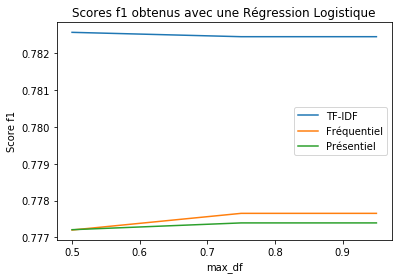

In [45]:
plt.plot(arrayMaxDf,res9,label="TF-IDF")
plt.plot(arrayMaxDf,res8,label="Fréquentiel")
plt.plot(arrayMaxDf,res7,label="Présentiel")
plt.xlabel("max_df")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec une Régression Logistique")
plt.legend()
plt.savefig("comparemaxdfEQ.png")

In [127]:
arrayNgram = [(1, 1), (1, 2), (1, 3), (1, 4), (1,5)]
res10=[]
for elt in arrayNgram:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(binary=True,max_features=30000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res10.append(statistics.mean(scores['test_score']))

res11=[]
for elt in arrayNgram:
    print(elt)
    clf = LogisticRegression()
    vect = txt.CountVectorizer(binary=False,max_features=30000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res11.append(statistics.mean(scores['test_score']))

res12=[]
for elt in arrayNgram:
    print(elt)
    clf = LogisticRegression()
    vect = txt.TfidfVectorizer(max_features=30000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res12.append(statistics.mean(scores['test_score']))

(1, 1)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 2)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 3)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 4)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 5)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 1)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 2)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 3)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 4)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 5)


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)


In [129]:
print(arraylabelsngrams)
print(res12)
print(res11)
print(res10)

['(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)']
[0.7824525267364263, 0.7907593979595315, 0.7919161003429418, 0.7905498211698945, 0.7901790808989512]
[0.7776537515328924, 0.7874868868808584, 0.7868362319791548, 0.7858429459120387, 0.7876567408316532]
[0.7773940316245828, 0.7879902405233604, 0.7856471166131876, 0.7856828721526781, 0.7850963481728044]


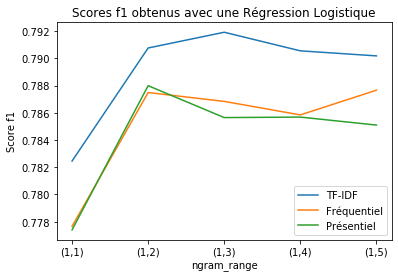

In [128]:
arraylabelsngrams = ["(1,1)","(1,2)","(1,3)","(1,4)","(1,5)"]
plt.plot(arraylabelsngrams,res12,label="TF-IDF")
plt.plot(arraylabelsngrams,res11,label="Fréquentiel")
plt.plot(arraylabelsngrams,res10,label="Présentiel")
plt.xlabel("ngram_range")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec une Régression Logistique")
plt.legend()
plt.savefig("comparengramEQ.png")

In [53]:
pipeline = Pipeline([
    ('tfidf', txt.TfidfVectorizer()),
    ('clf', LogisticRegression()),
])
parameters = {
    'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'tfidf__max_features': (10000,15000,20000,25000,35000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   29.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   48.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [54]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.75,
                                 max_features=20000, min_df=1,
                                 ngram_range=(1, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fi

In [57]:
pipeline = Pipeline([
    ('tfidf', txt.CountVectorizer()),
    ('clf', LogisticRegression()),
])
parameters = {
    'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'tfidf__max_features': (500,800,1200,25000,35000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   22.4s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.8s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.0min finished
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [58]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.75,
                                 max_features=25000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                       

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
vec = txt.CountVectorizer(max_df=0.75,min_df=1,ngram_range=(1,2))
bow = vec.fit_transform(dataEq)
clf = svm.SVC()
score = cross_validate(clf,bow,labelsEq,cv=5,scoring='f1')['test_score'].mean()
print(score)

0.7689546937253616


In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
vec = txt.CountVectorizer(max_df=0.75,min_df=0.01,ngram_range=(1,2))
bow = vec.fit_transform(dataEq)
clf = svm.SVC()
score = cross_validate(clf,bow,labelsEq,cv=5,scoring='f1')['test_score'].mean()
print(score)

0.7352379864994332


In [83]:
arrayMaxFeatures = np.append([200,500,800,1200,1500],np.arange(3000,40000,2000))
res20=[]
for elt in arrayMaxFeatures:
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=True,max_features=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res20.append(statistics.mean(scores['test_score']))

res21=[]
for elt in arrayMaxFeatures:
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=False,max_features=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res21.append(statistics.mean(scores['test_score']))

res22=[]
for elt in arrayMaxFeatures:
    clf = MultinomialNB()
    vect = txt.TfidfVectorizer(max_features=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res22.append(statistics.mean(scores['test_score']))



In [138]:
print(arrayMaxFeatures[19])
print(res22[19])
print(res21[19])
print(res20[19])

31000
0.7820718781973125
0.7844377596707388
0.7886592597617768


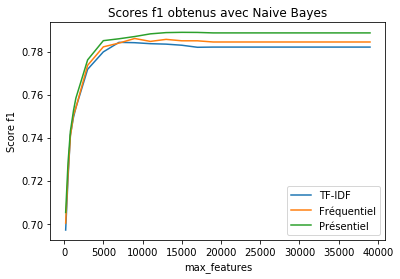

In [84]:
plt.plot(arrayMaxFeatures,res22,label="TF-IDF")
plt.plot(arrayMaxFeatures,res21,label="Fréquentiel")
plt.plot(arrayMaxFeatures,res20,label="Présentiel")
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec Naive Bayes")
plt.legend()
plt.savefig("maxfeaturesNB")

In [85]:
arrayMinDf = [0,0.05,0.1,0.15,0.25]
res23=[]
for elt in arrayMinDf:
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=True,min_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res23.append(statistics.mean(scores['test_score']))

res24=[]
for elt in arrayMinDf:
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=False,min_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res24.append(statistics.mean(scores['test_score']))

res25=[]
for elt in arrayMinDf:
    clf = MultinomialNB()
    vect = txt.TfidfVectorizer(min_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res25.append(statistics.mean(scores['test_score']))



In [139]:
print(arrayMinDf)
print(res25)
print(res24)
print(res23)

[0, 0.05, 0.1, 0.15, 0.25]
[0.7829324802535339, 0.6802494631368613, 0.6359368244112384, 0.634012445033555, 0.5944551970968679]
[0.784990062148272, 0.6768411935487132, 0.6332457308010019, 0.6276374213367139, 0.5862762312578589]
[0.7889216960865902, 0.6848822907111412, 0.6432332853869819, 0.6322054600426724, 0.5947532220013464]


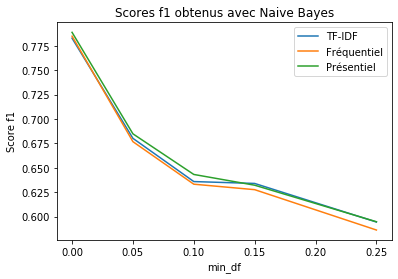

In [88]:
plt.plot(arrayMinDf,res25,label="TF-IDF")
plt.plot(arrayMinDf,res24,label="Fréquentiel")
plt.plot(arrayMinDf,res23,label="Présentiel")
plt.xlabel("min_df")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec Naive Bayes")
plt.legend()
plt.savefig("mindfNB")

In [90]:
arrayMaxDf = [0.5,0.75,0.8,0.9,0.95]
res26=[]
for elt in arrayMaxDf:
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=True,max_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res26.append(statistics.mean(scores['test_score']))

res27=[]
for elt in arrayMaxDf:
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=False,max_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res27.append(statistics.mean(scores['test_score']))

res28=[]
for elt in arrayMaxDf:
    clf = MultinomialNB()
    vect = txt.TfidfVectorizer(max_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res28.append(statistics.mean(scores['test_score']))



In [140]:
print(arrayMaxDf)
print(res28)
print(res27)
print(res26)

[0.5, 0.75, 0.8, 0.9, 0.95]
[0.7824783028713704, 0.7829324802535339, 0.7829324802535339, 0.7829324802535339, 0.7829324802535339]
[0.7862574168848332, 0.784990062148272, 0.784990062148272, 0.784990062148272, 0.784990062148272]
[0.7876401839575395, 0.7889216960865902, 0.7889216960865902, 0.7889216960865902, 0.7889216960865902]


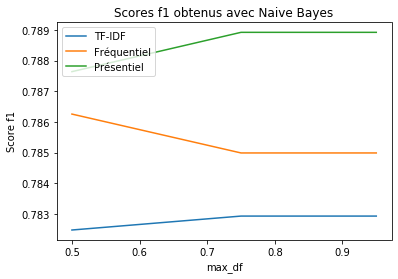

In [94]:
plt.plot(arrayMaxDf,res28,label="TF-IDF")
plt.plot(arrayMaxDf,res27,label="Fréquentiel")
plt.plot(arrayMaxDf,res26,label="Présentiel")
plt.xlabel("max_df")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec Naive Bayes")
plt.legend()
plt.savefig("maxdfNB")

In [95]:
arrayNgram = [(1, 1), (1, 2), (1, 3), (1, 4),(1, 5)]
res29=[]
for elt in arrayNgram:
    print(elt)
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=True,max_features=15000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res29.append(statistics.mean(scores['test_score']))

res30=[]
for elt in arrayNgram:
    print(elt)
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=False,max_features=15000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res30.append(statistics.mean(scores['test_score']))

res31=[]
for elt in arrayNgram:
    print(elt)
    clf = MultinomialNB()
    vect = txt.TfidfVectorizer(max_features=15000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res31.append(statistics.mean(scores['test_score']))

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)


In [141]:
print(arraylabelsngrams)
print(res31)
print(res30)
print(res29)

['(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)']
[0.7829324802535339, 0.7879139799464201, 0.788299877818763, 0.7881276127502652, 0.7885635178400591]
[0.784990062148272, 0.7910059714323424, 0.7886133049558677, 0.7901282566097749, 0.7892438781814716]
[0.7889216960865902, 0.7920122412993978, 0.7922391770047243, 0.7921108693649535, 0.7925144456801447]


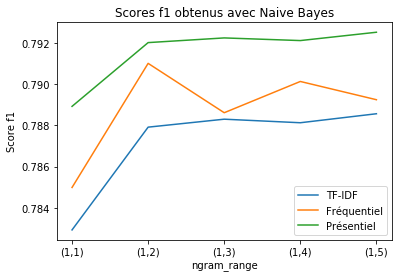

In [97]:
arraylabelsngrams = ["(1,1)","(1,2)","(1,3)","(1,4)","(1,5)"]
plt.plot(arraylabelsngrams,res31,label="TF-IDF")
plt.plot(arraylabelsngrams,res30,label="Fréquentiel")
plt.plot(arraylabelsngrams,res29,label="Présentiel")
plt.xlabel("ngram_range")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec Naive Bayes")
plt.legend()
plt.savefig("comparengramNB.png")

In [109]:
pipeline = Pipeline([
    ('tfidf', txt.CountVectorizer()),
    ('clf', MultinomialNB()),
])
parameters = {
    'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1, 2),(1,3)],
    'tfidf__max_features': (12000,10000,25000,30000,35000,40000,60000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   40.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [110]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.75,
                                 max_features=40000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
0.7973543820366144


In [111]:
pipeline = Pipeline([
    ('tfidf', txt.CountVectorizer(binary=True)),
    ('clf', MultinomialNB()),
])
parameters = {
    'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1, 2),(1,3)],
    'tfidf__max_features': (12000,10000,25000,30000,35000,40000,60000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   20.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   37.7s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   48.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        CountVectorizer(analyzer='word',
                                                        binary=True,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [112]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.75,
                                 max_features=35000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
0.7999462741344074


In [113]:
pipeline = Pipeline([
    ('tfidf', txt.TfidfVectorizer()),
    ('clf', MultinomialNB()),
])
parameters = {
    'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1, 2),(1,3)],
    'tfidf__max_features': (12000,10000,25000,30000,35000,40000,60000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   35.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   48.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [114]:
print(grid_search_tune.best_estimator_)
print(grid_search_tune.best_score_)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.75,
                                 max_features=25000, min_df=1,
                                 ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
0.7936984

In [143]:
arrayMaxFeatures = np.append([200,500,800,1200,1500],np.arange(3000,40000,2000))
res20=[]
for elt in arrayMaxFeatures:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.CountVectorizer(binary=True,max_features=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res20.append(statistics.mean(scores['test_score']))

res21=[]
for elt in arrayMaxFeatures:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.CountVectorizer(binary=False,max_features=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res21.append(statistics.mean(scores['test_score']))

res22=[]
for elt in arrayMaxFeatures:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.TfidfVectorizer(max_features=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res22.append(statistics.mean(scores['test_score']))



200
500


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


800


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1200


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1500


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3000
5000
7000
9000
11000
13000
15000
17000
19000
21000
23000
25000
27000
29000
31000
33000
35000
37000
39000
200


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


500


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


800


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1200


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1500


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


7000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


9000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


11000
13000
15000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


17000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


19000
21000
23000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


25000
27000
29000
31000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


33000
35000


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


37000
39000
200
500
800
1200
1500
3000
5000
7000
9000
11000
13000
15000
17000
19000
21000
23000
25000
27000
29000
31000
33000
35000
37000
39000


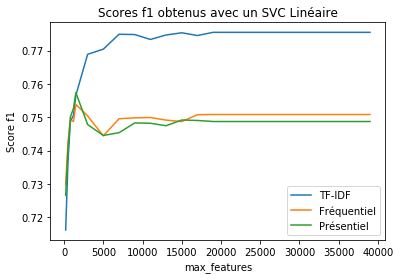

In [144]:
plt.plot(arrayMaxFeatures,res22,label="TF-IDF")
plt.plot(arrayMaxFeatures,res21,label="Fréquentiel")
plt.plot(arrayMaxFeatures,res20,label="Présentiel")
plt.xlabel("max_features")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec un SVC Linéaire")
plt.legend()
plt.savefig("maxfeaturesSVC")

In [149]:
arrayMinDf = [0,0.05,0.1,0.15,0.25]
res23=[]
for elt in arrayMinDf:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.CountVectorizer(binary=True,min_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res23.append(statistics.mean(scores['test_score']))

res24=[]
for elt in arrayMinDf:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.CountVectorizer(binary=False,min_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res24.append(statistics.mean(scores['test_score']))

res25=[]
for elt in arrayMinDf:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.TfidfVectorizer(min_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res25.append(statistics.mean(scores['test_score']))



0
0.05
0.1
0.15
0.25
0
0.05


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.15


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.25


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0
0.05
0.1
0.15
0.25


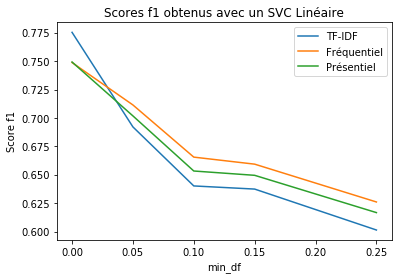

In [151]:
plt.plot(arrayMinDf,res25,label="TF-IDF")
plt.plot(arrayMinDf,res24,label="Fréquentiel")
plt.plot(arrayMinDf,res23,label="Présentiel")
plt.xlabel("min_df")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec un SVC Linéaire")
plt.legend()
plt.savefig("mindfSVC")

In [152]:
arrayMaxDf = [0.5,0.75,0.8,0.9,0.95]
res26=[]
for elt in arrayMaxDf:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.CountVectorizer(binary=True,max_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res26.append(statistics.mean(scores['test_score']))

res27=[]
for elt in arrayMaxDf:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.CountVectorizer(binary=False,max_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res27.append(statistics.mean(scores['test_score']))

res28=[]
for elt in arrayMaxDf:
    print(elt)
    clf = svm.LinearSVC()
    vect = txt.TfidfVectorizer(max_df=elt,max_features=15000)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res28.append(statistics.mean(scores['test_score']))



0.5
0.75
0.8
0.9
0.95
0.5
0.75


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9
0.95
0.5
0.75
0.8
0.9
0.95


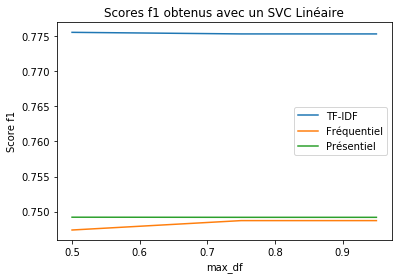

In [156]:
plt.plot(arrayMaxDf,res28,label="TF-IDF")
plt.plot(arrayMaxDf,res27,label="Fréquentiel")
plt.plot(arrayMaxDf,res26,label="Présentiel")
plt.xlabel("max_df")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec un SVC Linéaire")
plt.legend()
plt.savefig("maxdfSVC")

In [154]:
arrayNgram = [(1, 1), (1, 2), (1, 3), (1, 4),(1, 5)]
res29=[]
for elt in arrayNgram:
    print(elt)
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=True,max_features=15000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res29.append(statistics.mean(scores['test_score']))

res30=[]
for elt in arrayNgram:
    print(elt)
    clf = MultinomialNB()
    vect = txt.CountVectorizer(binary=False,max_features=15000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res30.append(statistics.mean(scores['test_score']))

res31=[]
for elt in arrayNgram:
    print(elt)
    clf = MultinomialNB()
    vect = txt.TfidfVectorizer(max_features=15000,ngram_range=elt)
    x_train = vect.fit_transform(data)
    scores = cross_validate(clf,x_train, labels, cv=5, scoring='f1')
    res31.append(statistics.mean(scores['test_score']))

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)


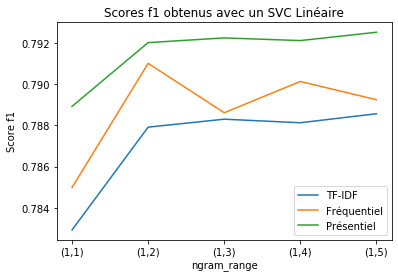

In [157]:
arraylabelsngrams = ["(1,1)","(1,2)","(1,3)","(1,4)","(1,5)"]
plt.plot(arraylabelsngrams,res31,label="TF-IDF")
plt.plot(arraylabelsngrams,res30,label="Fréquentiel")
plt.plot(arraylabelsngrams,res29,label="Présentiel")
plt.xlabel("ngram_range")
plt.ylabel("Score f1")
plt.title("Scores f1 obtenus avec un SVC Linéaire")
plt.legend()
plt.savefig("comparengramNB.png")

In [159]:
data, labels = file_arrayRaw(fname_train,10000)
data_train, data_test, y_train, y_test = train_test_split( data, labels, test_size=0.3)

RL = MultinomialNB()
cv = txt.CountVectorizer()
x_train = cv.fit_transform(data_train)
RL.fit(x_train,y_train)
x_test = cv.transform(data_test)
ypred = RL.predict(x_test)
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,ypred))

nblignes = 57413
              precision    recall  f1-score   support

        -1.0       0.62      0.45      0.52      2218
         1.0       0.92      0.96      0.94     15006

    accuracy                           0.89     17224
   macro avg       0.77      0.71      0.73     17224
weighted avg       0.88      0.89      0.89     17224



In [224]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
           xticklabels=["", "classe -1","",'classe 1'], yticklabels=["","",'classe -1',"","","", 'classe 1',"",""],
           title=title,
           ylabel='Classe réelle',
           xlabel='Classe prédite')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization


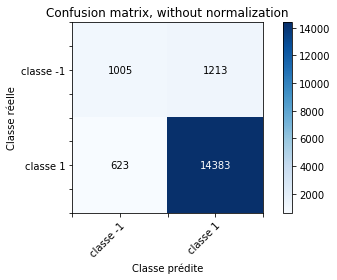

In [225]:
class_names=np.array(['classe -1', 'classe 1'])
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, ypred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


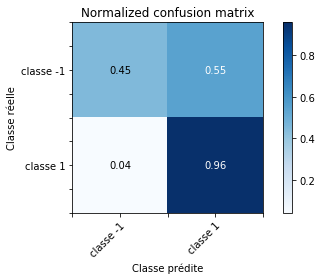

In [228]:
plot_confusion_matrix(y_test, ypred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("confusionNEQ")
plt.show()


In [229]:
dataEq.shape

(15046,)

In [234]:
data, labels = file_arrayRaw(fname_train,10000)
data_train, data_test, y_train, y_test = train_test_split( dataEq, labelsEq, test_size=0.3)

RL = MultinomialNB()
cv = txt.CountVectorizer()
x_train = cv.fit_transform(data_train)
RL.fit(x_train,y_train)
x_test = cv.transform(data_test)
ypred = RL.predict(x_test)
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,ypred))

nblignes = 57413
              precision    recall  f1-score   support

          -1       0.77      0.81      0.79      2262
           1       0.80      0.76      0.78      2252

    accuracy                           0.78      4514
   macro avg       0.78      0.78      0.78      4514
weighted avg       0.78      0.78      0.78      4514



Normalized confusion matrix


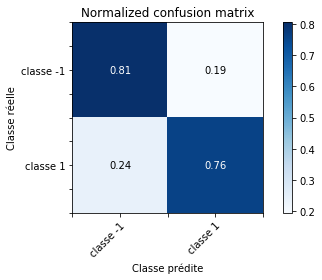

In [236]:
plot_confusion_matrix(y_test, ypred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("confusionEQ")
plt.show()


In [10]:
data, labels = file_arrayRaw(fname_train,10000)
data_train, data_test, y_train, y_test = train_test_split( data, labels, test_size=0.3)


nblignes = 57413


In [11]:
data2, labels2 = file_array(fname_train,10000)
data_train, data_test, y_train, y_test = train_test_split( data2, labels2, test_size=0.3)


nblignes = 57413


In [12]:
data.shape

(57413,)

In [13]:
data2.shape

(57413,)

In [14]:
print(data[0])
print(data2[0])

 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

quand dis cher amis agit là formul diplomat express ressen 


In [ ]:
pipeline = Pipeline([
    ('tfidf', txt.CountVectorizer()),
    ('clf', MultinomialNB()),
])
parameters = {
    'tfidf__max_df': [0.75,1.0],
    'tfidf__ngram_range': [(1, 2),(1,3)],
    'tfidf__max_features': (12000,10000,25000,30000,35000,100000)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4,verbose=10)
grid_search_tune.fit(data, labels)

In [ ]:
Pipeline(memory=None,
         steps=[('tfidf',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.75,
                                 max_features=35000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

